In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
df = pd.read_csv("column_2C_weka.csv")
print (df.shape )
df.head()

(310, 7)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [53]:
reg = LinearRegression() 

x = df.iloc [: , [-2]]
y = df.iloc [: , [-3]]


x_train , x_test , y_train ,y_test = train_test_split (x,y , test_size = 0.2 , shuffle=True)

In [54]:
reg.fit(x_train,y_train)
#reg.fit(x,y)

y_pred = reg.predict(x_test)   

In [55]:
print (y_pred.shape)
print (x_test.shape)

print (y_pred [:10])
print ("------")
print (y[:10])

(62, 1)
(62, 1)
[[117.22016824]
 [118.51197747]
 [117.86231626]
 [118.48083255]
 [117.74743005]
 [118.12007556]
 [117.87358961]
 [116.2114952 ]
 [118.59043912]
 [116.28949424]]
------
   pelvic_radius
0      98.672917
1     114.405425
2     105.985135
3     101.868495
4     108.168725
5     130.327871
6     120.567523
7     117.270067
8     125.002893
9      84.241415


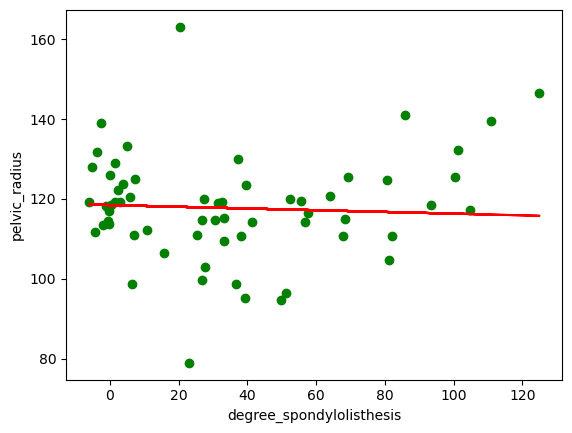

In [56]:
plt.scatter(x_test,y_test , color="green")
plt.xlabel("degree_spondylolisthesis")
plt.ylabel("pelvic_radius")

plt.plot(x_test,y_pred,color="red")
plt.show()

In [57]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)  # increase 2 feature  

x_polynomial = polynomial_regression.fit_transform(x)
print (x_polynomial.shape)

(310, 3)


In [58]:
x_train2 , x_test2 , y_train2 ,y_test2 = train_test_split (x_polynomial,y , test_size = 0.2 , shuffle=True)

In [59]:
linear_regression2 = LinearRegression()
linear_regression2.fit(x_train2,y_train2)

y_pred2 = linear_regression2.predict(x_test2)

print (x_test.shape)
print (y_test.shape)

(62, 1)
(62, 1)


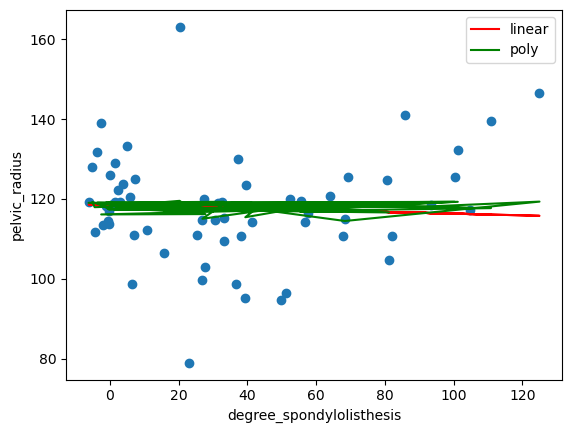

In [60]:


plt.scatter(x_test,y_test)



plt.xlabel("degree_spondylolisthesis")
plt.ylabel("pelvic_radius")
plt.plot(x_test,y_pred,color="red",label ="linear")     # old regression

plt.plot(x_test,y_pred2,color= "green",label = "poly")  # new regression is more accuracy
plt.legend()
plt.show()